In [55]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Wed Sep 27 14:34:20 2017
This is a small project for CNN in KERAS.
This file creates, trains and save a convolutional neural network for
Human Acitivity Recognition. The data we used for this file is released and provided by
Wireless Sensor Data Mining (WISDM) lab and can be found on this link.
http://www.cis.fordham.edu/wisdm/dataset.php  
Feel free to use this code and site this repositry if you use it for your reports or project.
@author: Muhammad Shahnawaz
"""
# importing libraries and dependecies 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
#from keras import backend as K
from tensorflow.keras import optimizers
#K.set_image_dim_ordering('th')
# setting up a random seed for reproducibility
random_seed = 611
np.random.seed(random_seed)

# matplotlib inline
plt.style.use('ggplot')
# defining function for loading the dataset
def readData(filePath):
    # attributes of the dataset
    columnNames = ['user_id','activity','timestamp','x-axis','y-axis','z-axis','x-rotate','y-rotate','z-rotate','arms','rrms','roll','pitch']
    data = pd.read_csv(filePath,header = None, names=columnNames,na_values=';')
    return data
# defining a function for feature normalization
# (feature - mean)/stdiv
def featureNormalize(dataset):
    mu = np.mean(dataset,axis=0)
    sigma = np.std(dataset,axis=0)
    return (dataset-mu)/sigma
# defining the function to plot a single axis data
def plotAxis(axis,x,y,title):
    axis.plot(x,y)
    axis.set_title(title)
    axis.xaxis.set_visible(False)
    axis.set_ylim([min(y)-np.std(y),max(y)+np.std(y)])
    axis.set_xlim([min(x),max(x)])
    axis.grid(True)
# defining a function to plot the data for a given activity
def plotActivity(activity,data):
    fig,(ax0,ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9) = plt.subplots(nrows=10, figsize=(15,10),sharex=True)
    plotAxis(ax0,data['timestamp'],data['x-axis'],'x-axis')
    plotAxis(ax1,data['timestamp'],data['y-axis'],'y-axis')
    plotAxis(ax2,data['timestamp'],data['z-axis'],'z-axis')
    plotAxis(ax3,data['timestamp'],data['x-rotate'],'x-rotate')
    plotAxis(ax4,data['timestamp'],data['y-rotate'],'y-rotate')
    plotAxis(ax5,data['timestamp'],data['z-rotate'],'z-rotate')
    plotAxis(ax6,data['timestamp'],data['arms'],'arms')
    plotAxis(ax7,data['timestamp'],data['rrms'],'rrms')
    plotAxis(ax8,data['timestamp'],data['roll'],'roll')
    plotAxis(ax9,data['timestamp'],data['pitch'],'pitch')
    plt.subplots_adjust(hspace=0.2)
    fig.suptitle(activity)
    plt.subplots_adjust(top=0.9)
    plt.show()
# defining a window function for segmentation purposes
def windows(data,size):
    start = 0
    while start< data.count():
        yield int(start), int(start + size)
        start+= (size/2)
# segmenting the time series
def segment_signal(data, window_size = 50):
    segments = np.empty((0,window_size,10))
    labels= np.empty((0))
    for (start, end) in windows(data['timestamp'],window_size):
        x = data['x-axis'][start:end]
        y = data['y-axis'][start:end]
        z = data['z-axis'][start:end]
        a = data['x-rotate'][start:end]
        b = data['y-rotate'][start:end]
        c = data['z-rotate'][start:end]
        d = data['arms'][start:end]
        e = data['rrms'][start:end]
        f = data['roll'][start:end]
        g = data['pitch'][start:end]
        if(len(data['timestamp'][start:end])==window_size):
            segments = np.vstack([segments,np.dstack([x,y,z,a,b,c,d,e,f,g])])
            labels = np.append(labels,stats.mode(data['activity'][start:end])[0][0])
    return segments, labels
''' Main Code '''
# # # # # # # # #   reading the data   # # # # # # # # # # 
# Path of file #

#dataset = readData('TEST_xin_all_col_13.txt')
#dataset = readData('TEST_mz_squat_situp_col_13.txt')
#dataset = readData('TEST_ljy_pushup_squat.txt')
dataset = readData('TEST_ljy_pushup_situp_squat.txt') # TEST_ljy_pushup_situp_squat.txt 파일에 xin situp 추가한 파일





In [56]:
print(dataset['activity'])
print('pushup : ',dataset['activity'].tolist().count('pushup'))
print('situp : ',dataset['activity'].tolist().count('situp'))
print('squat : ',dataset['activity'].tolist().count('squat'))

0        squat
1        squat
2        squat
3        squat
4        squat
         ...  
4154    pushup
4155    pushup
4156    pushup
4157    pushup
4158    pushup
Name: activity, Length: 4159, dtype: object
pushup :  1771
situp :  57
squat :  2331


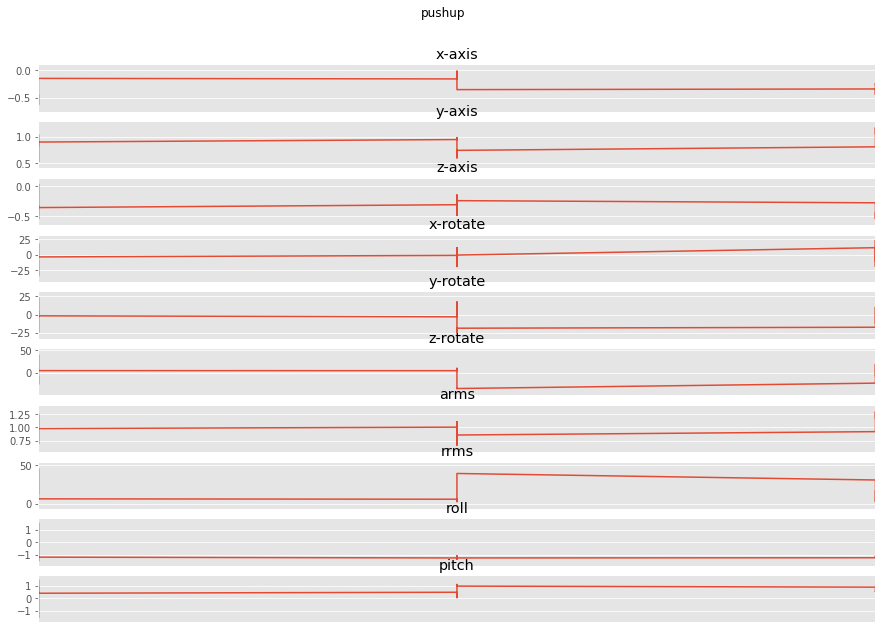

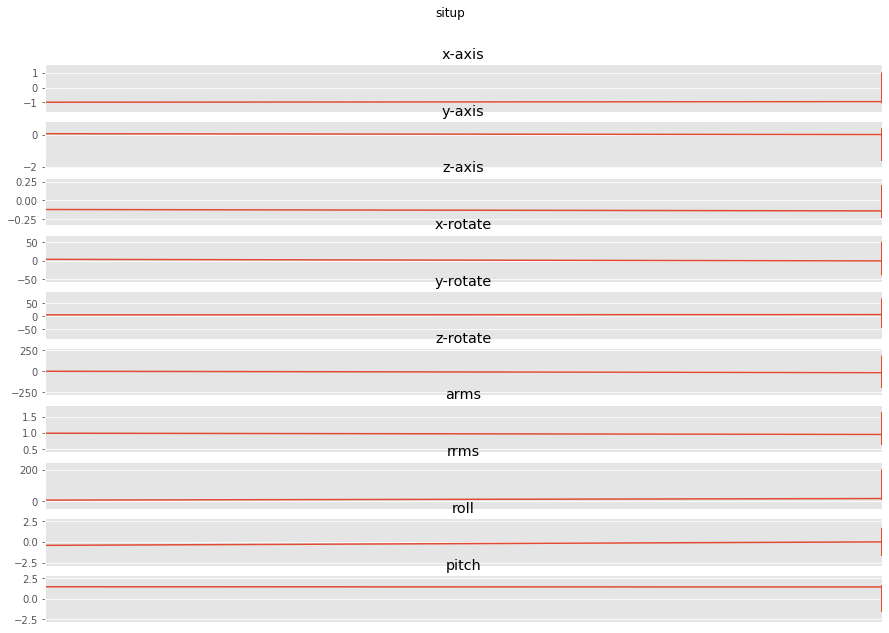

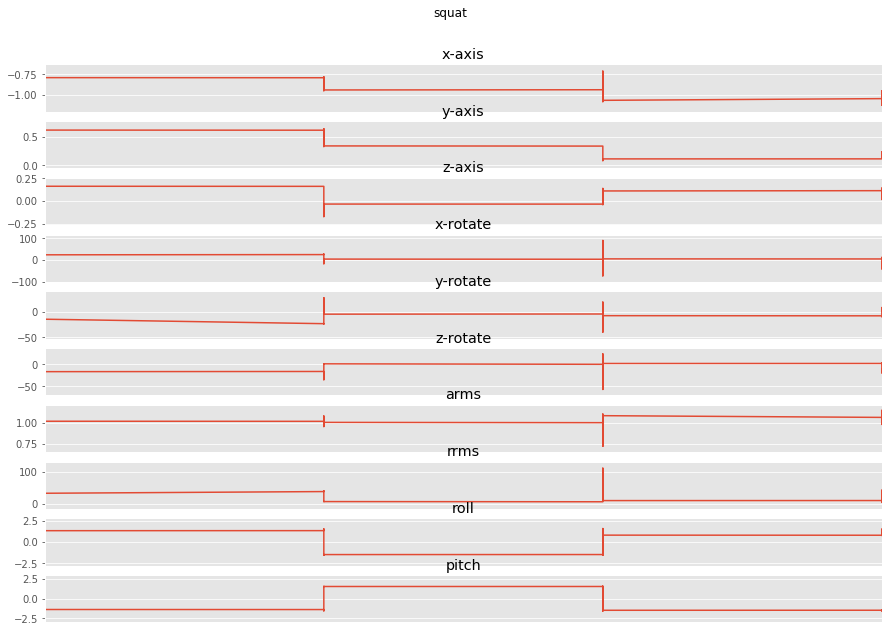

groundTruth.npy [[0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 1 0]
 [0 1 0]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1

In [57]:
# plotting a subset of the data to visualize
for activity in np.unique(dataset['activity']):
    subset = dataset[dataset['activity']==activity][:180]
    plotActivity(activity,subset)
# segmenting the signal in overlapping windows of 90 samples with 50% overlap

segments, labels = segment_signal(dataset) # 2737 개의 row가 들어가면 59개의 결과만 나온다. 
#print(segments)
#print(labels)
#categorically defining the classes of the activities
labels = np.asarray(pd.get_dummies(labels),dtype = np.int8)
#print(labels)

# defining parameters for the input and network layers
# we are treating each segmeent or chunk as a 2D image (90 X 3)
numOfRows = segments.shape[1]
numOfColumns = segments.shape[2]
numChannels = 1
numFilters = 128 # number of filters in Conv2D layer
# kernal size of the Conv2D layer
kernalSize1 = 2
# max pooling window size
poolingWindowSz = 2
# number of filters in fully connected layers
numNueronsFCL1 = 128
numNueronsFCL2 = 128
# split ratio for test and validation
trainSplitRatio = 0.8
# number of epochs
Epochs = 10
# batchsize
batchSize = 10
# number of total clases
numClasses = labels.shape[1]
# dropout ratio for dropout layer
dropOutRatio = 0.2
# reshaping the data for network input
reshapedSegments = segments.reshape(segments.shape[0], numOfRows, numOfColumns,1)


# splitting in training and testing data
trainSplit = np.random.rand(len(reshapedSegments)) < trainSplitRatio
trainX = reshapedSegments[trainSplit]

testX = reshapedSegments
testX = np.nan_to_num(testX)


testY = labels
#print(testY)

np.save('groundTruth.npy',testY)
np.save('testData.npy',testX)

print('groundTruth.npy',testY)
print('ㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡ')
print('testData.npy',testX)